# Understand Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data
import yfinance as yf
yf.pdr_override()

In [6]:
# input
symbol = 'BGN.MI'
start = '2014-01-01'
end = '2023-06-25'

# Read data
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,22.760000,22.790001,22.57,22.760000,13.372980,143919
2014-01-03,22.760000,22.879999,22.57,22.740000,13.361230,112908
2014-01-06,22.690001,22.980000,20.49,21.500000,12.632649,103106
2014-01-07,21.940001,22.700001,21.83,22.379999,13.149707,243926
2014-01-08,22.320000,22.420000,21.82,21.950001,12.897055,320030


In [7]:
# Create more data
dataset['Increase/Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset['Class'] = np.where(dataset['Return'].shift(-1) > dataset['Return'],'Increase','Decrease')

In [9]:
print("Exploratory Data Analysis")
print("Stock Data")
print('-'*40)
print("Dataset information")
print(dataset.info(memory_usage='deep',verbose=False))
print('-'*40)
print(dataset.info())
print('-'*40)
print("Data type:")
print(dataset.dtypes)
print('-'*40)
print("Check unique values without NaN")
print(dataset.nunique())
print('-'*40)
print("Data shape:")
print(dataset.shape)
print('-'*40)
print("Data columns Names:")
print(dataset.columns)
print('-'*40)
print("Check for NaNs:")
print(dataset.isnull().values.any())
print('-'*40)
print("How many NaN it has in each columns?")
#print(dataset.isnull.sum())
print('-'*40)
print("Data Statistics Summary:")
print(dataset.describe())

Exploratory Data Analysis
Stock Data
----------------------------------------
Dataset information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2409 entries, 2014-01-03 to 2023-06-23
Columns: 11 entries, Open to Class
dtypes: float64(6), int64(4), object(1)
memory usage: 359.9 KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2409 entries, 2014-01-03 to 2023-06-23
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2409 non-null   float64
 1   High               2409 non-null   float64
 2   Low                2409 non-null   float64
 3   Close              2409 non-null   float64
 4   Adj Close          2409 non-null   float64
 5   Volume             2409 non-null   int64  
 6   Increase/Decrease  2409 non-null   int64  
 7   Buy_Sell_on_Open   2409 non-null   int64  
 8   Buy_Sell           2409 non-null   int64  
 9   Return  

In [10]:
# Check for headers
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase/Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Return', 'Class'],
      dtype='object')

In [11]:
# Check for type of data in each columns
dataset.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Increase/Decrease      int64
Buy_Sell_on_Open       int64
Buy_Sell               int64
Return               float64
Class                 object
dtype: object

In [12]:
dataset.shape

(2409, 11)

In [13]:
# Descriptions
print(dataset.describe())

              Open         High          Low        Close    Adj Close  \
count  2409.000000  2409.000000  2409.000000  2409.000000  2409.000000   
mean     26.780639    27.089610    26.439552    26.760299    20.349507   
std       5.035724     5.045517     5.028915     5.044580     6.172875   
min      16.120001    16.650000    15.750000    16.020000    10.721982   
25%      22.940001    23.260000    22.620001    22.920000    15.587702   
50%      26.740000    27.030001    26.379999    26.700001    19.056442   
75%      29.870001    30.209999    29.459999    29.790001    24.190971   
max      43.349998    43.540001    42.970001    43.200001    36.185944   

             Volume  Increase/Decrease  Buy_Sell_on_Open     Buy_Sell  \
count  2.409000e+03        2409.000000       2409.000000  2409.000000   
mean   3.580230e+05           0.494396          0.013699     0.022001   
std    2.293163e+05           0.500072          1.000114     0.999966   
min    0.000000e+00           0.000000   

In [14]:
# Check for class in dataset
print(dataset.groupby('Class').size())

Class
Decrease    1238
Increase    1171
dtype: int64


Decrease    1238
Increase    1171
Name: Class, dtype: int64

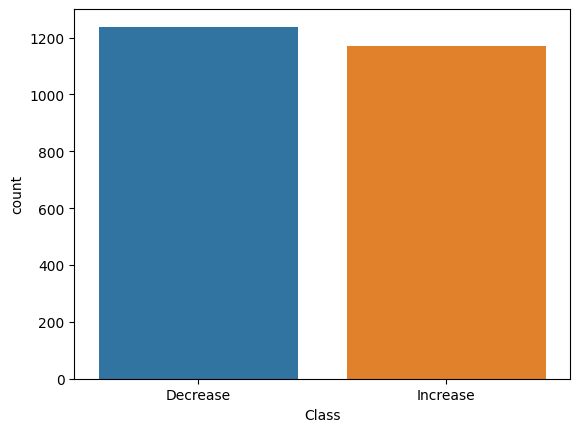

In [15]:
# Plot Class
import seaborn as sns

sns.countplot(x="Class", data=dataset)
dataset.loc[:,'Class'].value_counts()

In [16]:
# Check for NaN and Total of NaN
print(dataset.isnull().sum())

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase/Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Return               0
Class                0
dtype: int64


In [17]:
# Check missing value
print(dataset.isna().sum())

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase/Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Return               0
Class                0
dtype: int64


In [18]:
# Check unique values wihtout NaN
print(dataset.nunique())

Open                 1209
High                 1262
Low                  1260
Close                1265
Adj Close            1944
Volume               2402
Increase/Decrease       2
Buy_Sell_on_Open        2
Buy_Sell                2
Return               2367
Class                   2
dtype: int64


In [19]:
# Dataset information and prints all columns
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2409 entries, 2014-01-03 to 2023-06-23
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2409 non-null   float64
 1   High               2409 non-null   float64
 2   Low                2409 non-null   float64
 3   Close              2409 non-null   float64
 4   Adj Close          2409 non-null   float64
 5   Volume             2409 non-null   int64  
 6   Increase/Decrease  2409 non-null   int64  
 7   Buy_Sell_on_Open   2409 non-null   int64  
 8   Buy_Sell           2409 non-null   int64  
 9   Return             2409 non-null   float64
 10  Class              2409 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 225.8+ KB
None


In [20]:
# Dataset information
print(dataset.info(memory_usage='deep',verbose=False))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2409 entries, 2014-01-03 to 2023-06-23
Columns: 11 entries, Open to Class
dtypes: float64(6), int64(4), object(1)
memory usage: 359.9 KB
None


Visualization Data

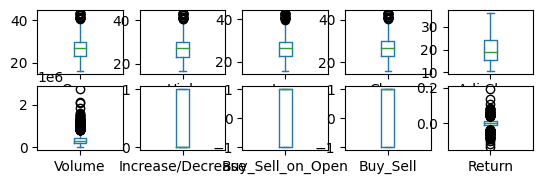

In [21]:
# Box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

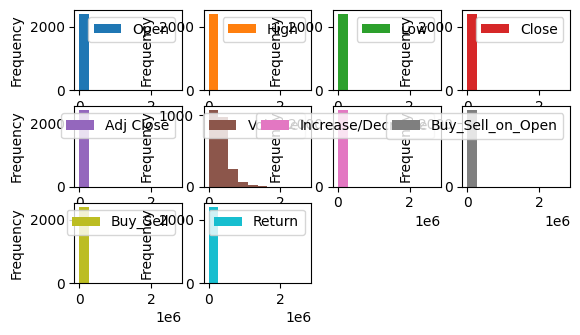

In [22]:
# Histogram plots
dataset.plot(kind='hist', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

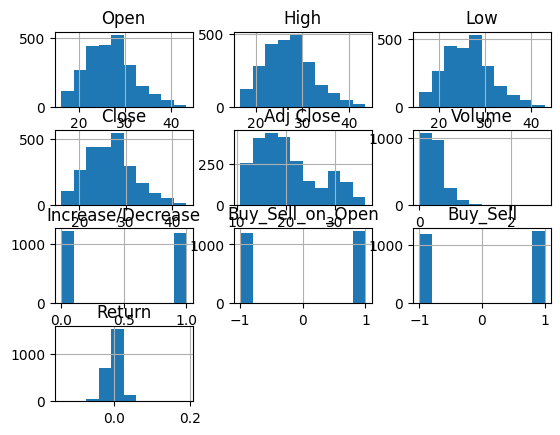

In [23]:
# Histograms
dataset.hist()
plt.show()

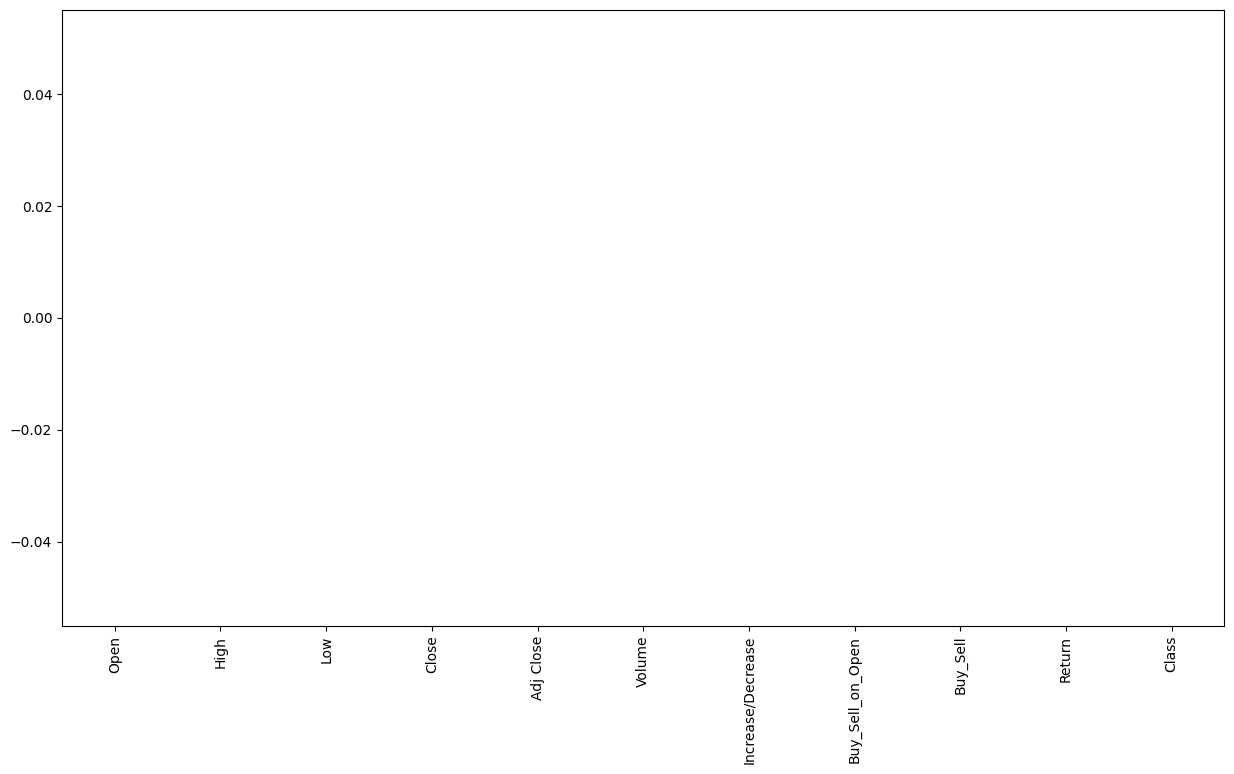

In [24]:
dataset_missing_count = dataset.isnull().sum() # Values of NaN is missing data
plt.rcParams['figure.figsize'] = (15,8)
dataset_missing_count.plot.bar()
plt.show()

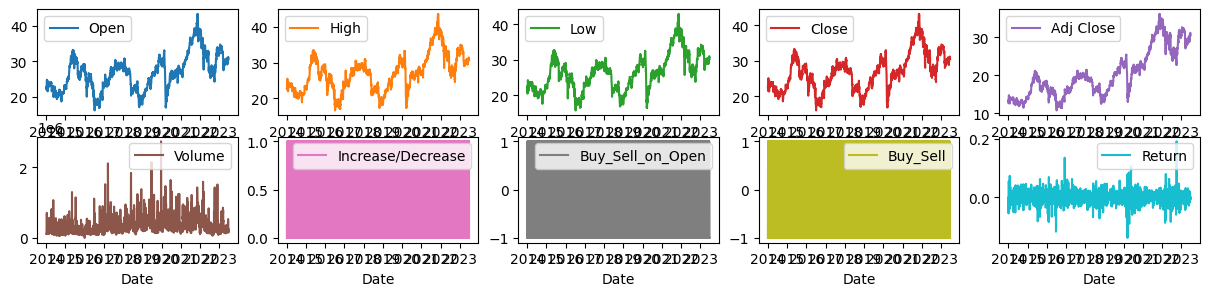

In [25]:
dataset.plot(kind='line', subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

In [26]:
X = dataset[['Open','High','Low','Adj Close']]
Y = dataset.index

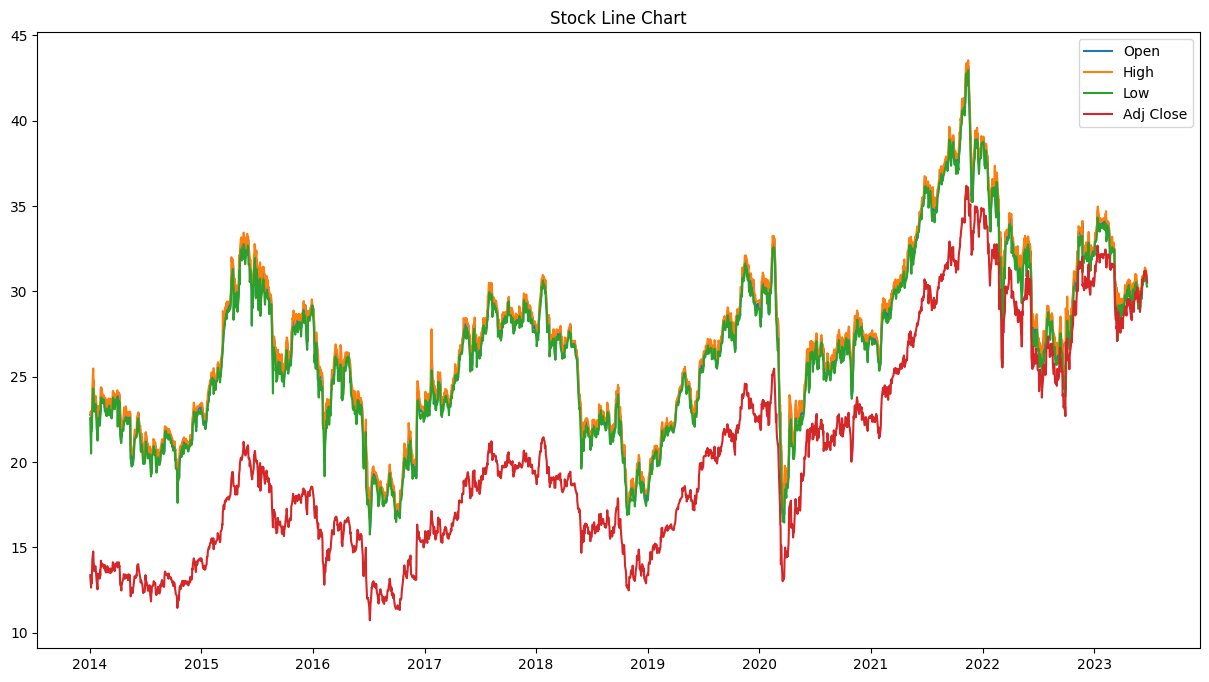

In [27]:
plt.plot(X)
plt.title('Stock Line Chart')
plt.legend(X)
plt.show()

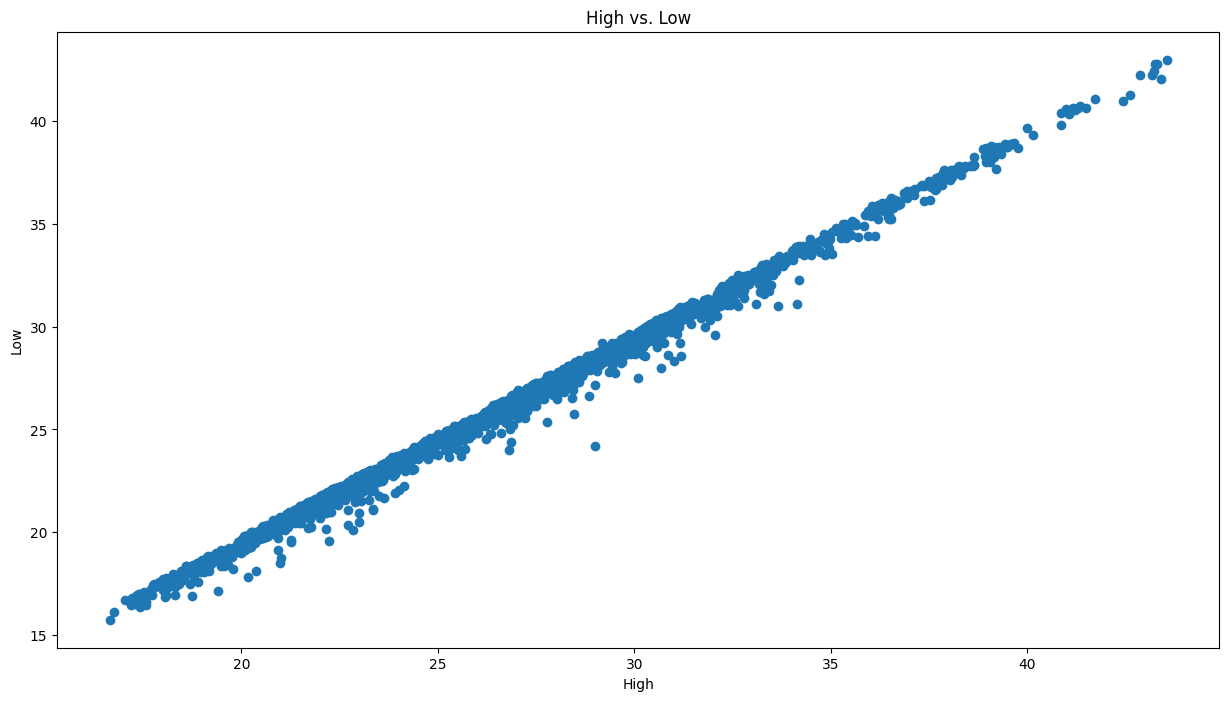

In [28]:
plt.scatter(dataset['High'], dataset['Low'])
plt.title("High vs. Low")
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

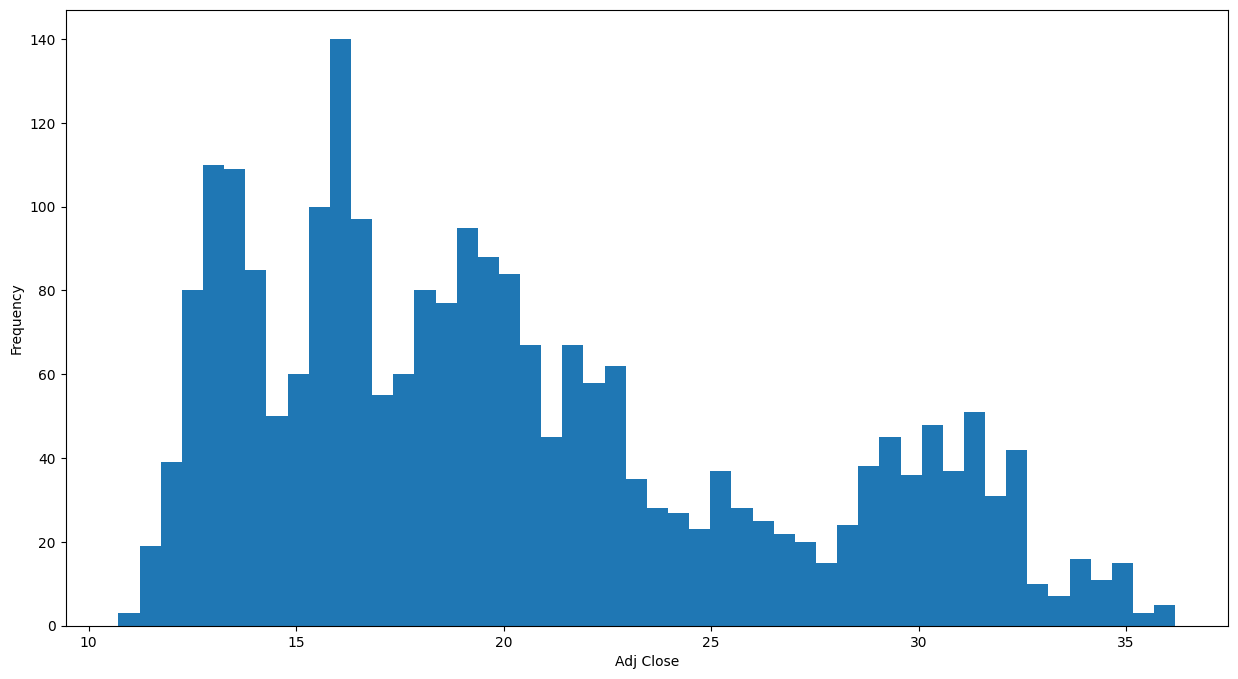

In [29]:
plt.hist(dataset['Adj Close'], bins = 50)
plt.xlabel("Adj Close")
plt.ylabel("Frequency")
plt.show()

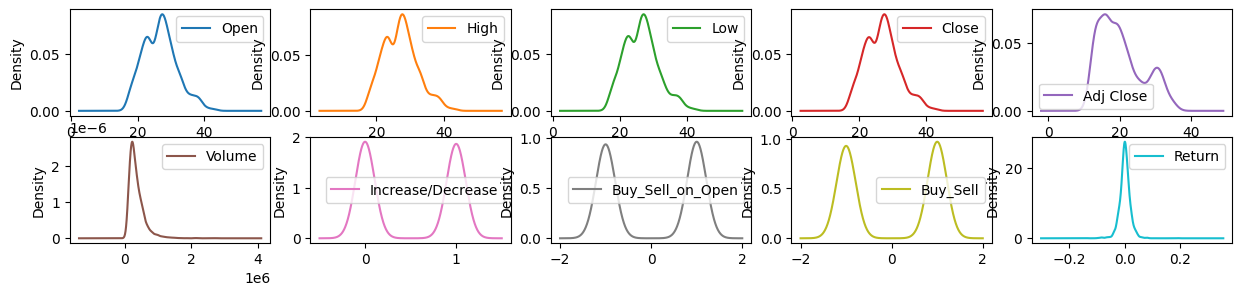

In [30]:
dataset.plot(kind='density', subplots=True, layout=(5,5), sharex=False)
plt.show()

In [31]:
X.columns

Index(['Open', 'High', 'Low', 'Adj Close'], dtype='object')

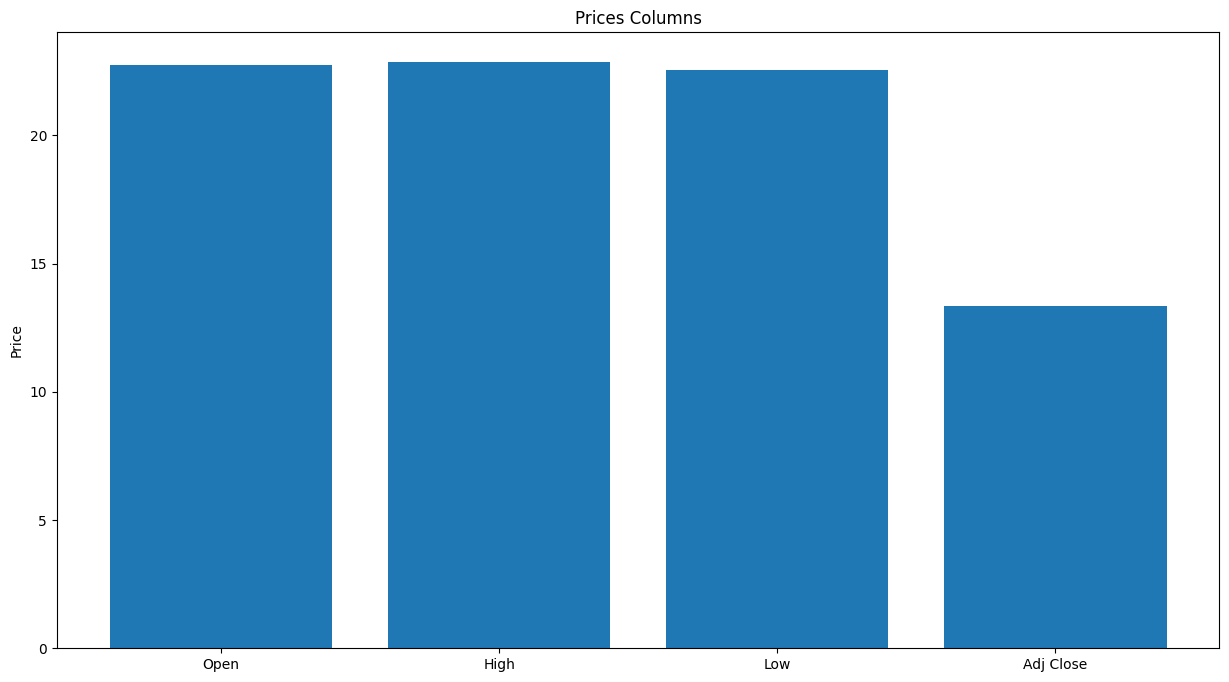

In [32]:
labels = ['Open','High','Low','Adj Close']
y_positions = range(len(labels))
# Creating our bar plot
plt.bar(y_positions, X.iloc[0])
plt.xticks(y_positions, labels)
plt.ylabel("Price")
plt.title("Prices Columns")
plt.show()

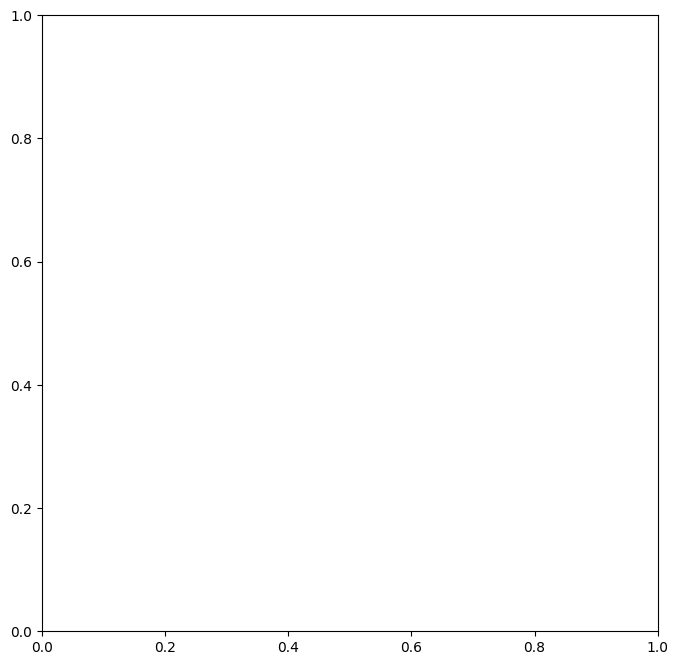

In [33]:
sizes = X.iloc[0]
labels = ['Open','High','Low','Adj Close']

plt.pie(sizes, labels = labels, autopct = "%.2f")
plt.axes().set_aspect("equal")
plt.show()

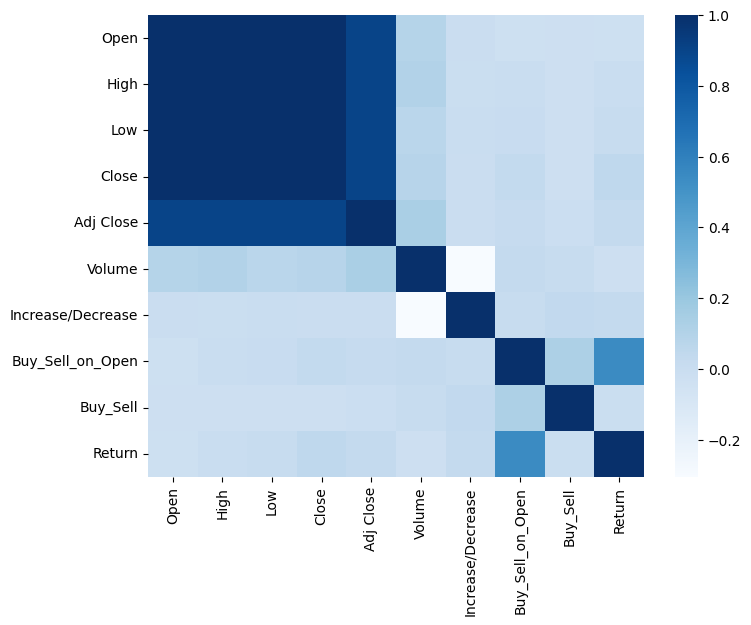

In [34]:
import seaborn as sns
#sns.set_style('White')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), cmap='Blues')
plt.show()

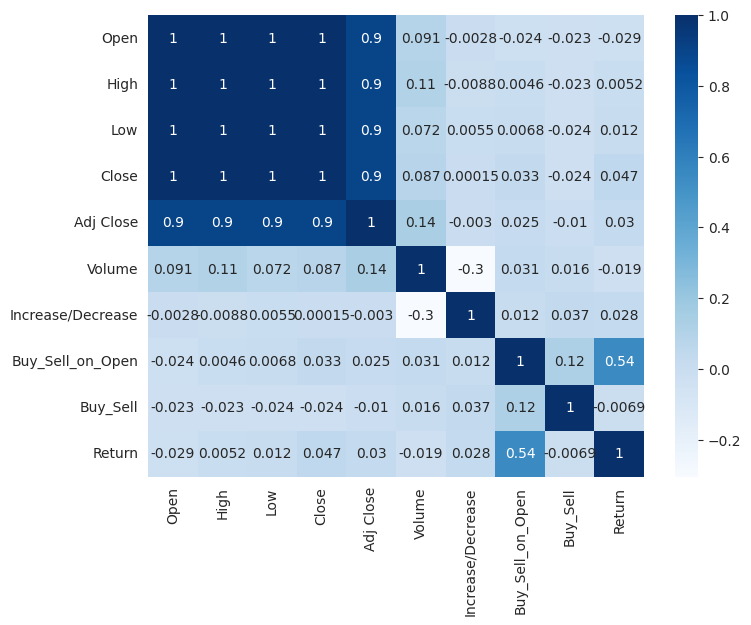

In [35]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(dataset.iloc[:dataset.shape[0]].corr(), annot = True, cmap = 'Blues')
plt.show()

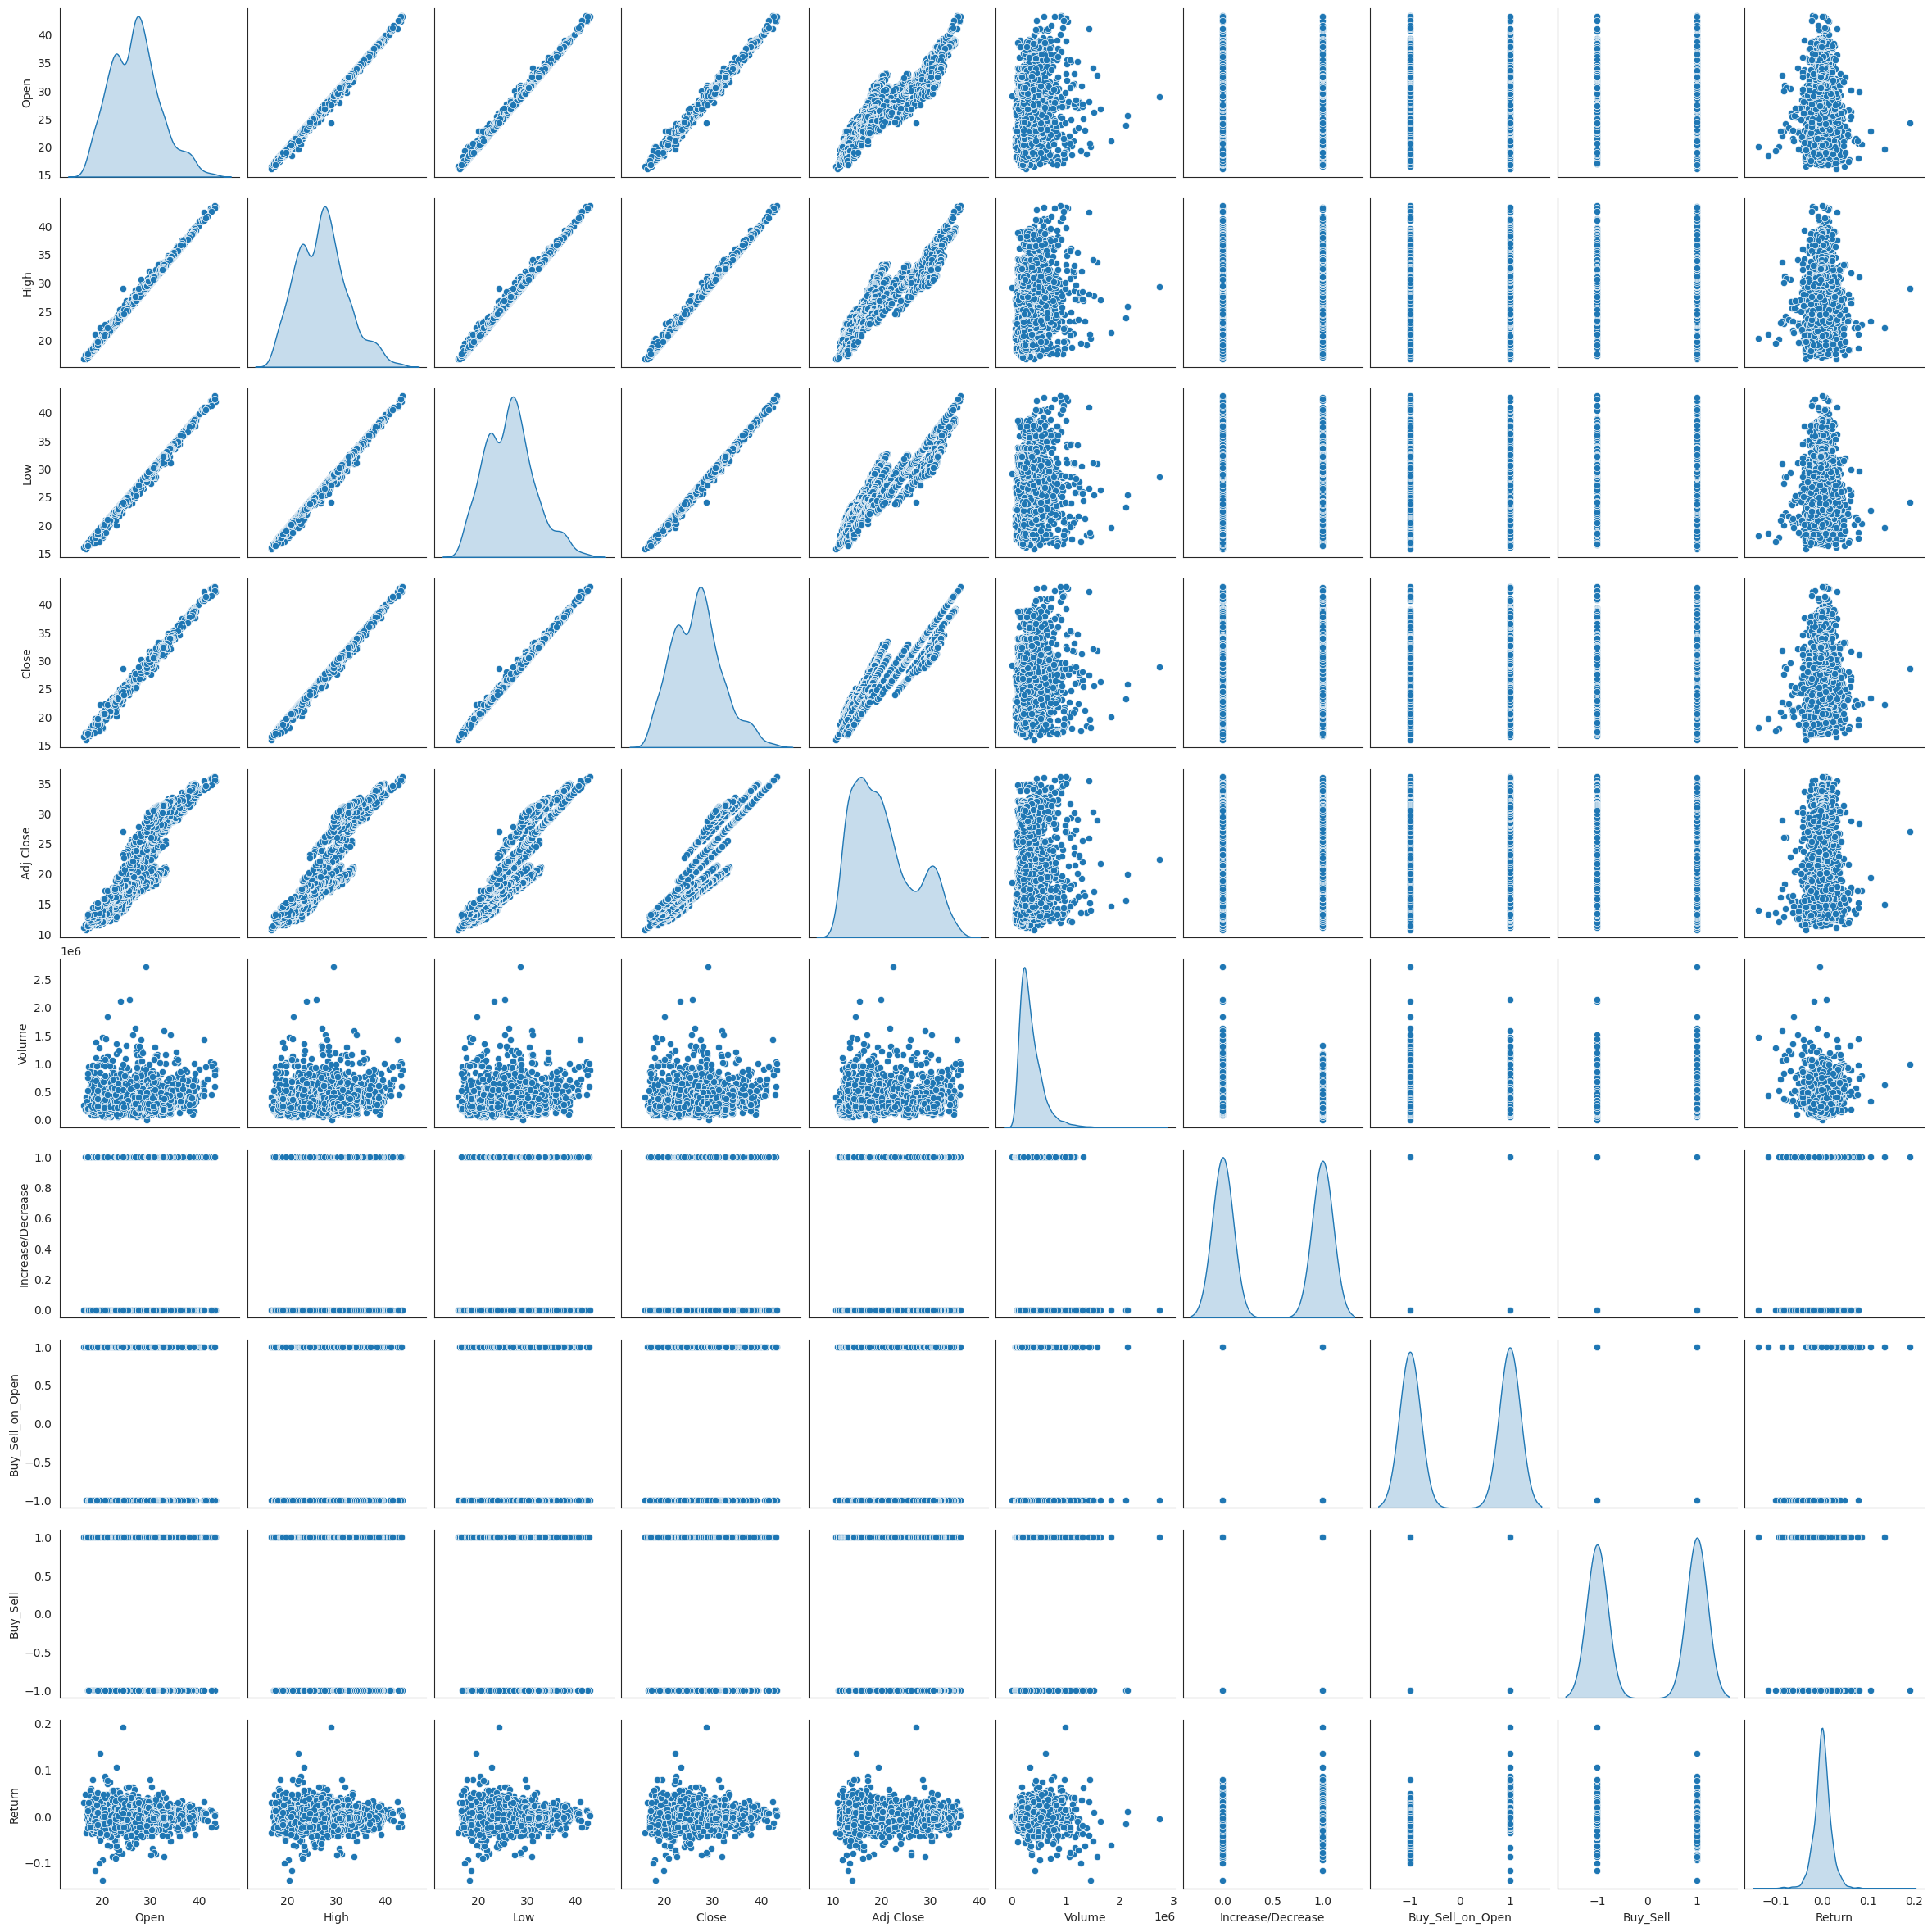

In [36]:
sns.pairplot(dataset, diag_kind='kde', size=2.4)

In [45]:
# import graph objects as "go"
!pip install chart_studio
import chart_studio
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go

#plotly.tools.set_credentials_file(username='QuantPython', api_key='bWmf0mKJlNViBrOjDQbE')

trace = go.Candlestick(x=dataset.index,
                       open=dataset.Open,
                       high=dataset.High,
                       low=dataset.Low,
                       close=dataset.Close)
data = [trace]
py.iplot(data, filename='simple_candlestick')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyboardInterrupt: ignored

In [46]:
x = dataset['Low']
y = dataset['High']
z = dataset['Adj Close']

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='YlGnBu',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

KeyboardInterrupt: ignored

In [47]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

# create a new line chat with a title and axis labels
p = figure(plot_width=400, plot_height=400)
p.line(dataset.index, dataset['Adj Close'])

# show the results
show(p)

In [48]:
# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600,
           title = 'Stock Prices',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = dataset['Open']
squares_y = dataset['Adj Close']
circles_x = dataset['Low']
circles_y = dataset['High']

# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)

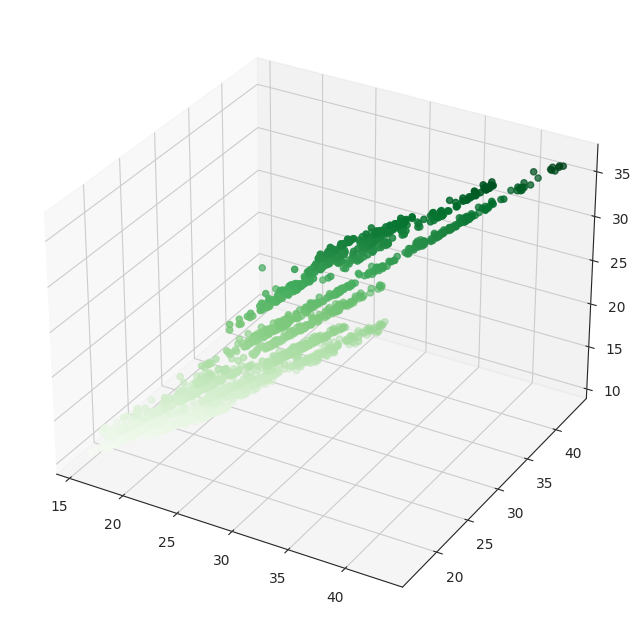

In [49]:
from mpl_toolkits import mplot3d

# Plot 3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = dataset['Adj Close']
xdata = dataset['Low']
ydata = dataset['High']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

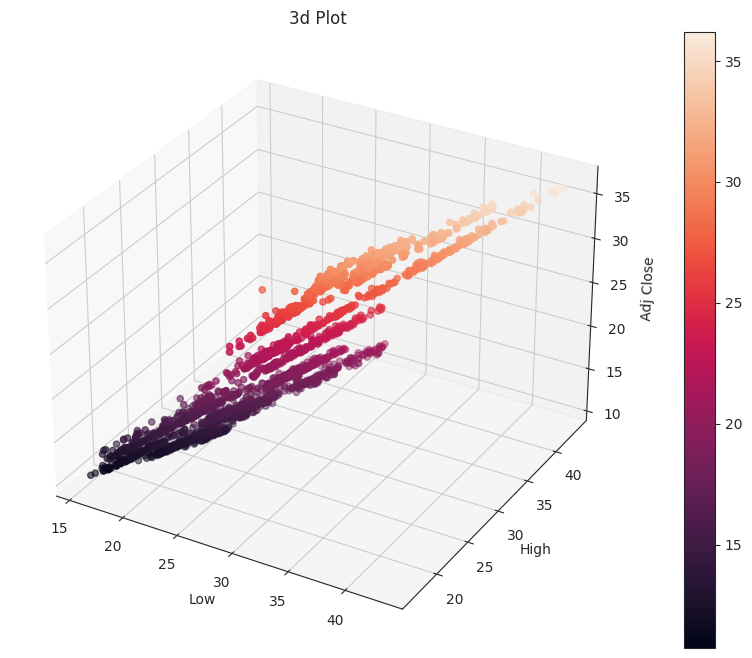

In [50]:
x = dataset['Low']
y = dataset['High']
z = dataset['Adj Close']

# Create plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pnt3d=ax.scatter(x,y,z,c=z)
cbar=plt.colorbar(pnt3d)

ax.set_title('3d Plot')
ax.set_xlabel('Low')
ax.set_ylabel('High')
ax.set_zlabel('Adj Close')
plt.show()

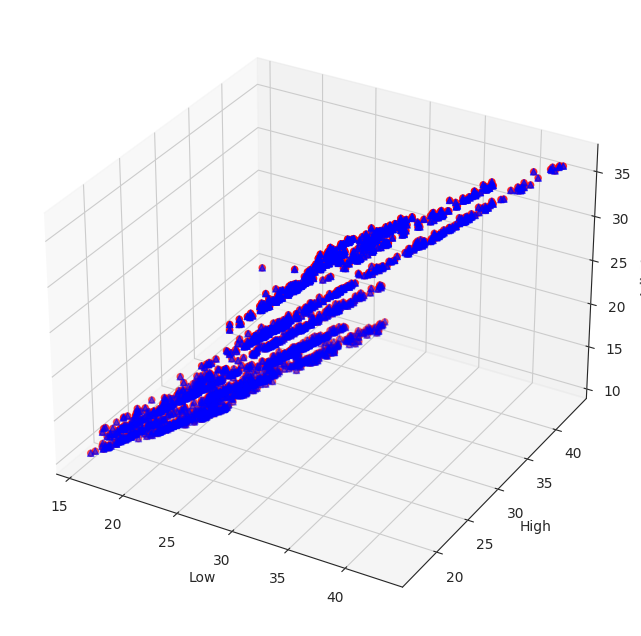

In [51]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    x = dataset['Low']
    y = dataset['High']
    z = dataset['Adj Close']
    ax.scatter(x, y, z, c=c, marker=m)

ax.set_xlabel('Low')
ax.set_ylabel('High')
ax.set_zlabel('Adj Close')

plt.show()

In [52]:
x = dataset['Low']
y = dataset['High']
z = dataset['Adj Close']

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, cmap='autumn', linewidth=0.2)
plt.show()

ax.set_xlabel('Low')
ax.set_ylabel('High')
ax.set_zlabel('Adj Close')

plt.show()

TypeError: ignored

<Figure size 1500x800 with 0 Axes>

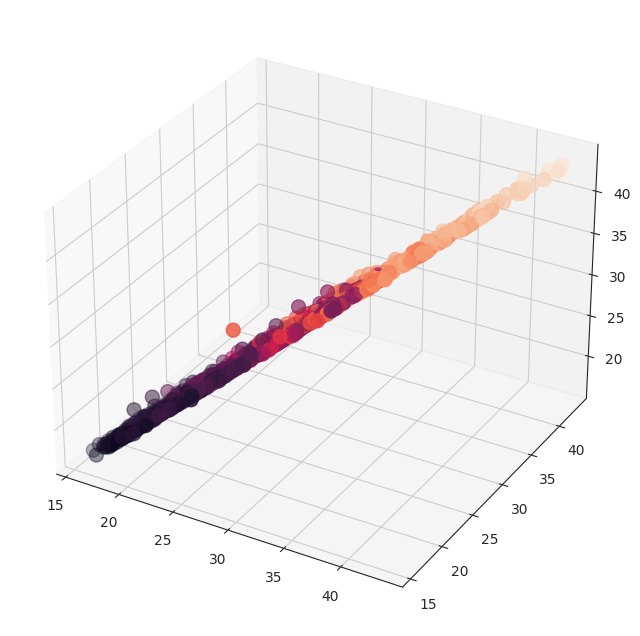

In [53]:
x = dataset['Open']
y = dataset['Low']
z = dataset['High']
v = dataset['Adj Close']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_trisurf(x,y,z, edgecolor="gray", color="None")
ax.scatter(x,y,z,c=v, s=100)

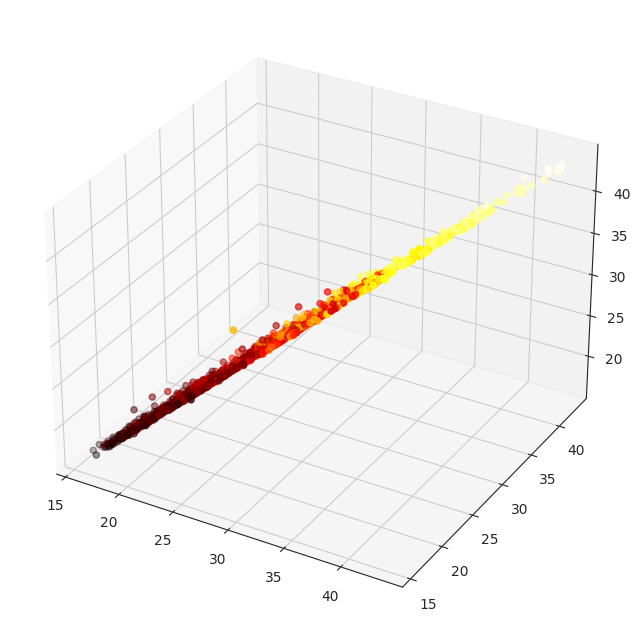

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = dataset['Open']
y = dataset['Low']
z = dataset['High']
v = dataset['Adj Close']

ax.scatter(x, y, z, c=v, cmap=plt.hot())
plt.show()

In [55]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Class
Date,,,,,,,,,,,
2014-01-03,22.760000,22.879999,22.57,22.740000,13.361230,112908,0,-1,-1,-0.000879,Decrease
2014-01-06,22.690001,22.980000,20.49,21.500000,12.632649,103106,1,-1,1,-0.054529,Increase
2014-01-07,21.940001,22.700001,21.83,22.379999,13.149707,243926,1,1,-1,0.040930,Decrease
2014-01-08,22.320000,22.420000,21.82,21.950001,12.897055,320030,1,1,1,-0.019214,Increase
2014-01-09,23.020000,23.200001,22.18,23.020000,13.525746,388631,1,-1,1,0.048747,Increase


In [56]:
# Class is categorical variable
# Convert to number
df_dummies = pd.get_dummies(dataset['Class'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([dataset, df_dummies], axis=1)
del df_new['Class']
df_new = df_new.rename(columns={"Decrease":"Increase_Decrease"})
df_new.head()

,Open,High,Low,Close,Adj Close,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Increase_Decrease
Date,,,,,,,,,,,
2014-01-03,22.760000,22.879999,22.57,22.740000,13.361230,112908,0,-1,-1,-0.000879,1
2014-01-06,22.690001,22.980000,20.49,21.500000,12.632649,103106,1,-1,1,-0.054529,0
2014-01-07,21.940001,22.700001,21.83,22.379999,13.149707,243926,1,1,-1,0.040930,1
2014-01-08,22.320000,22.420000,21.82,21.950001,12.897055,320030,1,1,1,-0.019214,0
2014-01-09,23.020000,23.200001,22.18,23.020000,13.525746,388631,1,-1,1,0.048747,0


In [57]:
X = dataset[['Open', 'High', 'Low', 'Volume', 'Increase/Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Return']]
Y = dataset['Adj Close']

In [58]:
X.dtypes

Open                 float64
High                 float64
Low                  float64
Volume                 int64
Increase/Decrease      int64
Buy_Sell_on_Open       int64
Buy_Sell               int64
Return               float64
dtype: object

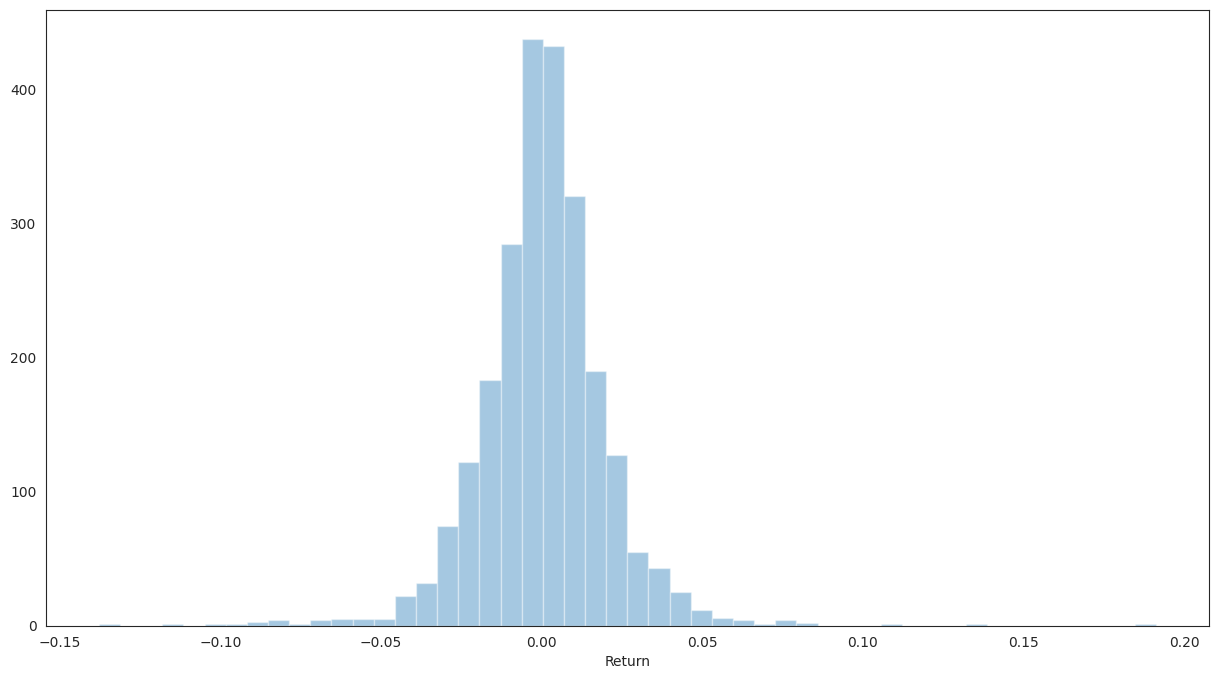

In [59]:
sns.distplot(X['Return'],kde = False)
plt.show()

In [60]:
# Rank Features
features = dataset[['Open', 'High', 'Low', 'Volume', 'Increase/Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Return']]

X = features.as_matrix()
y = dataset['Adj Close'].as_matrix()

AttributeError: ignored

In [61]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

YellowbrickValueError: ignored

In [62]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

YellowbrickValueError: ignored

In [63]:
from sklearn.linear_model import Lasso
from yellowbrick.features.importances import FeatureImportances

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(Lasso(), ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

ModuleNotFoundError: ignored

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances

# Data cannot be continuous
X = dataset[['Increase/Decrease', 'Buy_Sell_on_Open', 'Buy_Sell']]
y = dataset['Buy_Sell']

# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(X, y)
viz.poof()

ModuleNotFoundError: ignored

In [65]:
dataset_float = dataset.select_dtypes(include=['float']).copy()
dataset_float.head()

,Open,High,Low,Close,Adj Close,Return
Date,,,,,,
2014-01-03,22.760000,22.879999,22.57,22.740000,13.361230,-0.000879
2014-01-06,22.690001,22.980000,20.49,21.500000,12.632649,-0.054529
2014-01-07,21.940001,22.700001,21.83,22.379999,13.149707,0.040930
2014-01-08,22.320000,22.420000,21.82,21.950001,12.897055,-0.019214
2014-01-09,23.020000,23.200001,22.18,23.020000,13.525746,0.048747


In [66]:
dataset_int = dataset.select_dtypes(include=['int']).copy()
dataset_int.head()

,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell
Date,,,,
2014-01-03,112908,0,-1,-1
2014-01-06,103106,1,-1,1
2014-01-07,243926,1,1,-1
2014-01-08,320030,1,1,1
2014-01-09,388631,1,-1,1


In [67]:
dataset_object = dataset.select_dtypes(include=['object']).copy()
dataset_object.head()

,Class
Date,
2014-01-03,Decrease
2014-01-06,Increase
2014-01-07,Decrease
2014-01-08,Increase
2014-01-09,Increase


In [68]:
Increase = dataset_object[dataset_object=='Increase'].count().sum().astype(float)

In [69]:
Decrease = dataset_object[dataset_object=='Decrease'].count().sum().astype(float)

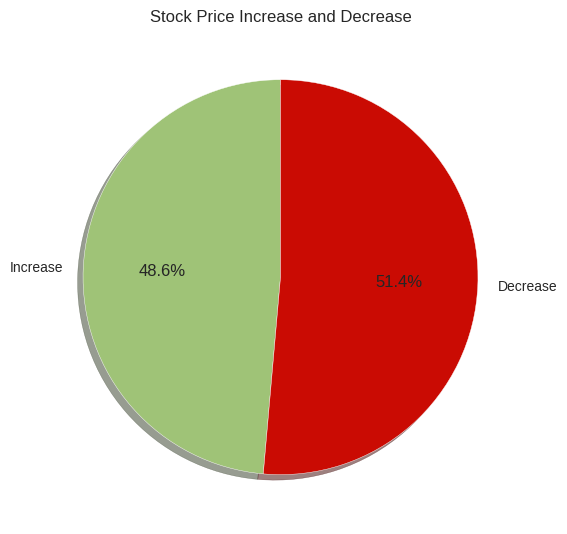

In [70]:
# Pie Charts for Class
new_dataset_object = [Increase, Decrease]
labels = ['Increase', 'Decrease']
colors = ['g', 'r']

plt.pie(new_dataset_object, labels=labels, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
plt.title('Stock Price Increase and Decrease')
plt.tight_layout()
plt.show()

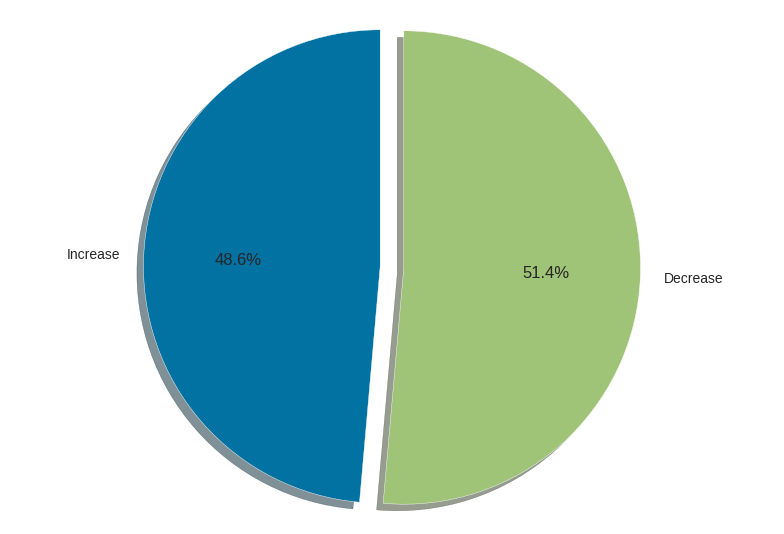

In [71]:
# Pie Charts for Class
new_dataset_object = [Increase, Decrease]
labels = ['Increase', 'Decrease']
colors = ['g', 'r']

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(new_dataset_object, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

plt.tight_layout()
plt.show()

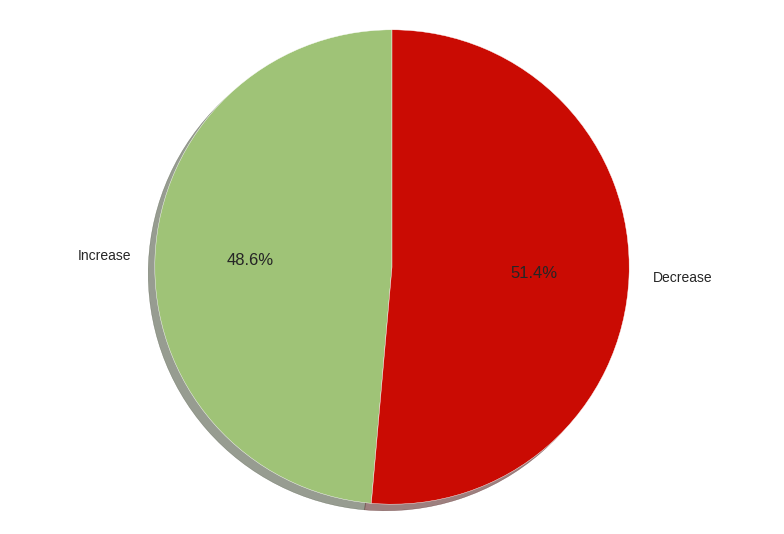

In [72]:
new_dataset_object = [Increase, Decrease]
labels = ['Increase', 'Decrease']
colors = ['g', 'r']

fig1, ax1 = plt.subplots()
ax1.pie(new_dataset_object, labels=labels, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')

ax1.axis('equal')
plt.tight_layout()
plt.show()

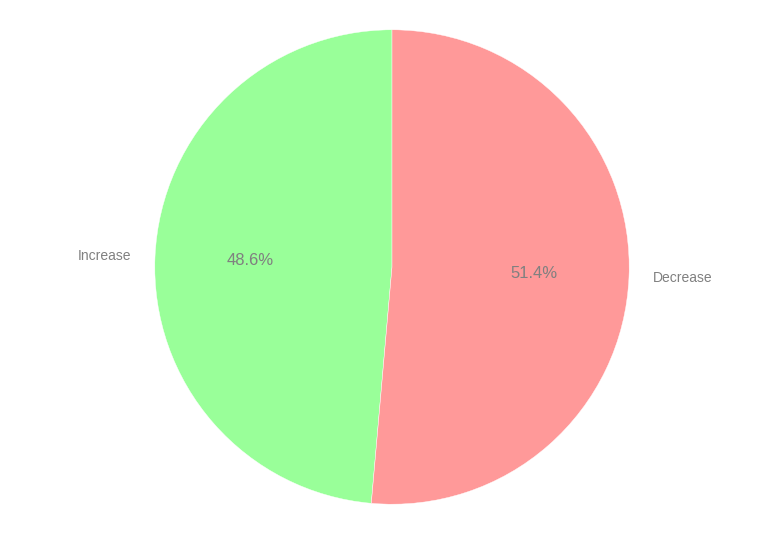

In [73]:
new_dataset_object = [Increase, Decrease]
labels = ['Increase', 'Decrease']
colors = ['#99ff99','#ff9999']

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(new_dataset_object, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('grey')

for autotext in autotexts:
    autotext.set_color('grey')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

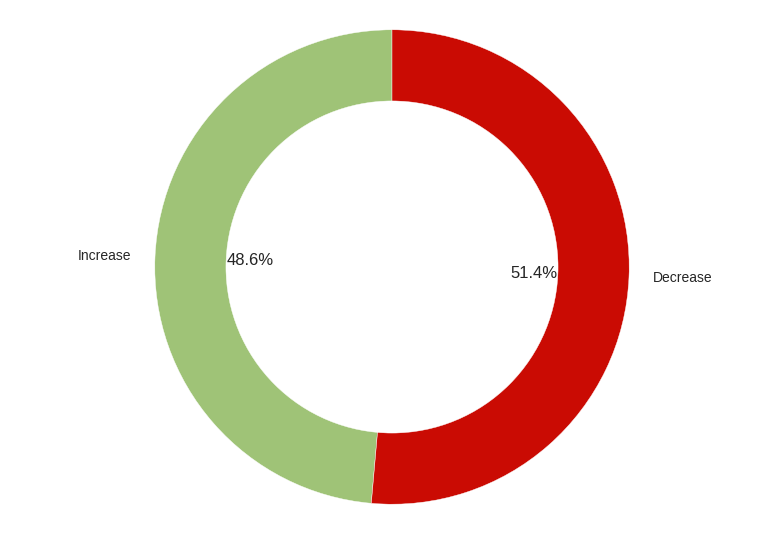

In [74]:
new_dataset_object = [Increase, Decrease]
labels = ['Increase', 'Decrease']
colors = ['g', 'r']

fig1, ax1 = plt.subplots()
ax1.pie(new_dataset_object, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

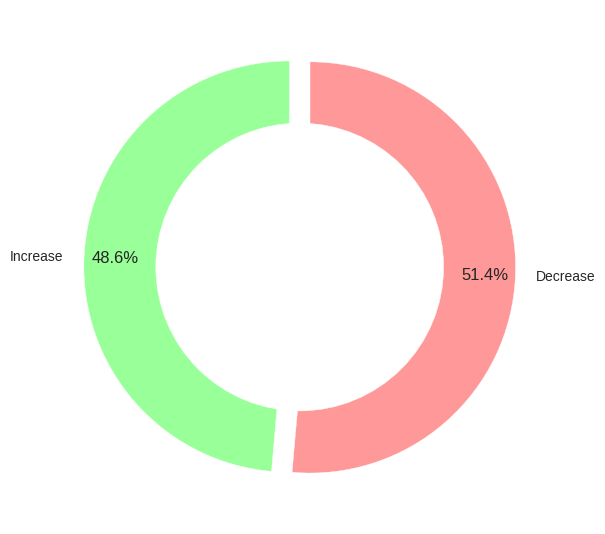

In [75]:
new_dataset_object = [Increase, Decrease]
labels = ['Increase', 'Decrease']
colors = ['#99ff99','#ff9999']

#explsion
explode = (0.05,0.05)

plt.pie(new_dataset_object, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()